In [1]:
from tensorflow.keras import optimizers

In [4]:
# Create an Adam optimizer with a learning rate of 0.001
# and gradient clipping with a maximum norm of 1
adam = optimizers.Adam(learning_rate=0.001, clipnorm=1)

In [5]:
#preprocessing

In [8]:
# Import the Tokenizer class for converting text into sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
# Create a Tokenizer instance
tokenizer = Tokenizer()
# Sample training text
train_text = "I am learning NLP and NLP is fun"

In [13]:
# Fit the tokenizer on the text (builds the word index)
tokenizer.fit_on_texts([train_text])

In [15]:
# Print the resulting word index (a dictionary of word -> integer)
#The Tokenizer assigns lower indices to words that appear more frequently.
#In this case, "NLP" appears twice, so it is assigned index 1.
print(tokenizer.word_index)

{'nlp': 1, 'i': 2, 'am': 3, 'learning': 4, 'and': 5, 'is': 6, 'fun': 7}


In [20]:
#Text to be encoded
sub_text = "I am learning NLP and NLP is fun "

In [21]:
# Convert the text to a sequence of integers
sequences = tokenizer.texts_to_sequences([sub_text])[0]

In [23]:
# Print the original text
print("Encoded text:", sub_text)

Encoded text: I am learning NLP and NLP is fun 


In [24]:
# Print the integer sequence
print("Sequence of integers:", sequences)

Sequence of integers: [2, 3, 4, 1, 5, 1, 6, 7]


In [25]:
#padding

In [26]:
# Pad the sequence (make it fixed length)

In [28]:
#maxlen=10 : Sets the fixed length of all sequences to 10. Sequences longer than 10 will be truncated; shorter sequences will be padded with zeros
#padding='post' : Adds the padding after the actual sequence (at the end).
#(default is padding='pre') : 'pre', padding is added before the sequence (at the beginning). For example, [0, 0, 1, 2, 3]

padded_sequence = pad_sequences([sequences], maxlen=10, padding='post')

In [31]:
print(padded_sequence)

[[2 3 4 1 5 1 6 7 0 0]]


In [35]:
padded_pre = pad_sequences([sequences], maxlen=10, padding='pre')

In [36]:
print(padded_pre)

[[0 0 2 3 4 1 5 1 6 7]]


In [39]:
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

In [40]:
# Create tokenizer and fit on tokenized texts
tokenizer = Tokenizer()

In [41]:
tokenizer.fit_on_texts(tokenized_text)

In [43]:
# Convert tokenized texts to sequences of integers
sequences = tokenizer.texts_to_sequences(tokenized_text)

In [44]:
print("Word index:", tokenizer.word_index)
print("Sequences:", sequences)

Word index: {'to': 1, 'see': 2, 'you': 3, 'hope': 4, 'soon': 5, 'nice': 6, 'again': 7}
Sequences: [[4, 1, 2, 3, 5], [6, 1, 2, 3, 7]]


In [45]:
#padding

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [49]:
padded_sequences = pad_sequences(sequences, padding='post')

In [50]:
print("Padded sequences:", padded_sequences)

Padded sequences: [[4 1 2 3 5]
 [6 1 2 3 7]]


In [53]:
#embedding layer

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding

In [59]:
# Calculate the vocabulary size for the embedding layer
# +1 is added because index 0 is reserved for padding (no actual word)
vocab_size = len(tokenizer.word_index) + 1

In [60]:
print(vocab_size)

8


In [61]:
num_words = len(tokenizer.word_index)

In [58]:
print(num_words)

7


In [62]:
embedding_dim = 4 

In [63]:
model = Sequential()

In [68]:
#Add an Embedding layer that maps integer word indices to dense vectors
# input_dim=8->  the embedding layer can handle integer word indices from 0 to 7
# output_dim=4->Each word will be represented as a 4-dimensional dense vector.
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim))

In [69]:
from datasets import load_dataset

In [70]:
dataset = load_dataset("imdb")

README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/21.0M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/20.5M [00:00<?, ?B/s]

unsupervised-00000-of-00001.parquet:   0%|          | 0.00/42.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

In [71]:
print(dataset["train"][0])

{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far be

In [72]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [73]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [74]:
# Training set texts: used for model training
train_texts = dataset["train"]["text"]
# Test set texts: used for evaluating model performance
test_texts = dataset["test"]["text"]

In [75]:
# Create a tokenizer with a vocabulary size limit of 10,000 words and specify "<OOV>" token for out-of-vocabulary words
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(train_texts)

In [76]:
# Convert text data into sequences of integers based on the tokenizer's word index
train_sequences = tokenizer.texts_to_sequences(train_texts)

In [77]:
test_sequences = tokenizer.texts_to_sequences(test_texts)

In [78]:
# Pad sequences to a maximum length of 200
max_length = 200

In [79]:
# If a sequence is shorter than 200, pad with 0s at the end (post-padding)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')

In [81]:
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

In [83]:
#get ready to put labels

In [84]:
import numpy as np

In [85]:
# Convert labels (0 = negative, 1 = positive) into NumPy arrays for training and testing

In [86]:
train_labels = np.array(dataset["train"]["label"])
test_labels = np.array(dataset["test"]["label"])

In [87]:
#model : Functional API

In [91]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Dropout

In [89]:
vocab_size = 10000  # Should match the num_words used in the tokenizer

In [90]:
embedding_dim = 64       # Size of the embedding vectors
max_length = 200         # Maximum length of input sequences

In [92]:
# Define input layer with fixed shape
input_layer = Input(shape=(max_length,), name='Input')

In [94]:
# Embedding layer: turns integers into dense vectors
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, name='Embedding')(input_layer)

/Users/jessicahong/.pyenv/versions/3.11.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [95]:
# LSTM layer: learns sequential patterns
lstm_layer = LSTM(64, name='LSTM')(embedding_layer)

In [96]:
# Dropout layer: helps prevent overfitting
dropout_layer = Dropout(0.5, name='Dropout')(lstm_layer)

In [97]:
# Output layer: binary classification
output_layer = Dense(1, activation='sigmoid', name='Output')(dropout_layer)

In [98]:
# Create the model
model = Model(inputs=input_layer, outputs=output_layer, name='IMDB_Classifier_Model')


In [99]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "IMDB_Classifier_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Embedding (Embedding)           │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
#Training the Model

In [101]:
#Train the model on padded sequences and labels
history = model.fit(
    train_padded,          # Input data
    train_labels,          # Corresponding labels
    epochs=5,              # Number of training epochs
    batch_size=128,        # Number of samples per gradient update
    validation_split=0.2,  # Use 20% of training data for validation
    verbose=1              # Show training progress
)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 124ms/step - accuracy: 0.6257 - loss: 0.6676 - val_accuracy: 0.0010 - val_loss: 0.9789
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - accuracy: 0.6396 - loss: 0.6418 - val_accuracy: 0.0598 - val_loss: 0.9972
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - accuracy: 0.6593 - loss: 0.6114 - val_accuracy: 0.0792 - val_loss: 1.0086
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 129ms/step - accuracy: 0.6776 - loss: 0.5855 - val_accuracy: 0.2262 - val_loss: 0.8992
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 126ms/step - accuracy: 0.7229 - loss: 0.5336 - val_accuracy: 0.6282 - val_loss: 0.5759


In [102]:
# Train the model using the training data
# - train_padded: input sequences
# - train_labels: binary sentiment labels (0 or 1)
# - validation_split: reserve part of training data for validation
# - batch_size: number of samples used per training step
# - epochs: number of passes through the full dataset

In [103]:
#Model Evaluation

In [104]:
#loss + accuracy

In [106]:
loss, accuracy = model.evaluate(test_padded, test_labels, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5530
Test Accuracy: 0.7455


In [108]:
#predicted values

In [110]:
# Predict probabilities for test data
y_probs = model.predict(test_padded, verbose=0)

# Convert probabilities to binary labels (threshold = 0.5)
# - If probability > 0.5, assign class 1 (positive)
# - Otherwise, assign class 0 (negative)
# - Flatten the array to 1D for compatibility with evaluation metrics
y_preds = (y_probs > 0.5).astype("int32").flatten()

In [111]:
#(Precision, Recall, F1, Accuracy

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Detailed Classification Metrics:")
print(f"Accuracy : {accuracy_score(test_labels, y_preds):.4f}")
print(f"Precision: {precision_score(test_labels, y_preds):.4f}")
print(f"Recall   : {recall_score(test_labels, y_preds):.4f}")
print(f"F1 Score : {f1_score(test_labels, y_preds):.4f}")

Detailed Classification Metrics:
Accuracy : 0.7455
Precision: 0.8129
Recall   : 0.6378
F1 Score : 0.7148


In [114]:
#Confusion Matrix 

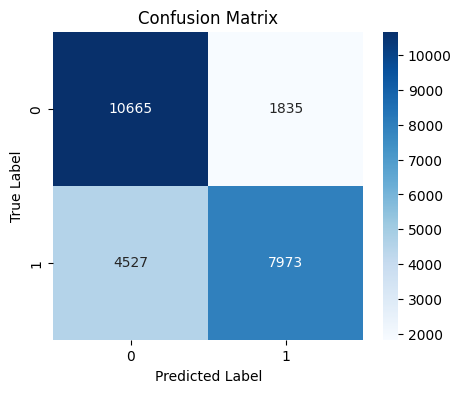

In [115]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(test_labels, y_preds)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [117]:
#ROC Curve(Receiver Operating Characteristic Curve) + AUC Score(Area Under the Curve)

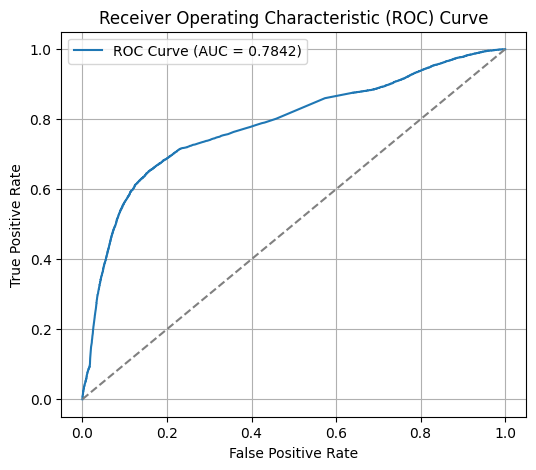

In [118]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(test_labels, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid(True)
plt.show()

In [119]:
#Precision-Recall Curve

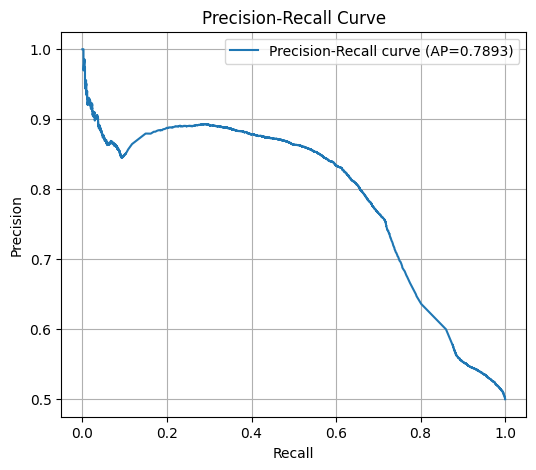

In [121]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision-recall pairs for different probability thresholds
# precision: array of precision values at each threshold
# recall: array of recall values at each threshold
# thresholds: array of threshold values used to compute precision and recall
precision, recall, thresholds = precision_recall_curve(test_labels, y_probs)

# Compute the average precision (AP) score, which summarizes the precision-recall curve as a single number
# AP is a weighted mean of precisions achieved at each threshold, with increase in recall from previous threshold used as weight
avg_precision = average_precision_score(test_labels, y_probs)

# Set up the plot size (width=6 inches, height=5 inches)
plt.figure(figsize=(6,5))

# Plot Recall (x-axis) against Precision (y-axis)
# Label includes the average precision value formatted to 4 decimal places
plt.plot(recall, precision, label=f'Precision-Recall curve (AP={avg_precision:.4f})')

# Label x-axis as 'Recall'
plt.xlabel('Recall')

# Label y-axis as 'Precision'
plt.ylabel('Precision')

# Title for the plot
plt.title('Precision-Recall Curve')

# Show legend on the plot (to display AP in the label)
plt.legend()

# Add a grid for easier reading of the plot
plt.grid(True)

# Display the plot
plt.show()


In [123]:
#Calibration Curve (Model Probability Calibration Evaluation)
#Evaluates how well the predicted probabilities from the model match the true likelihood of the event.

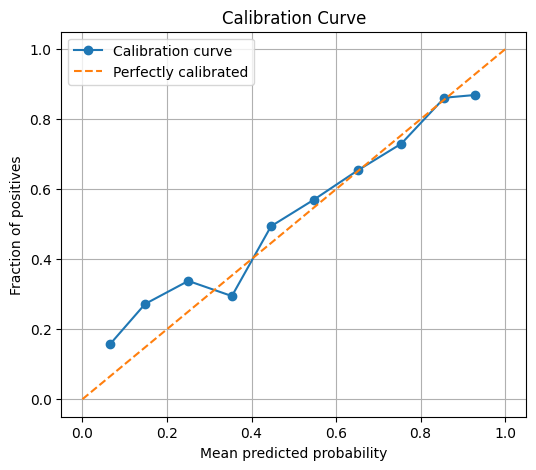

In [125]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Compute calibration curve (also known as reliability curve)
# prob_true: fraction of positives in each bin (true event rate)
# prob_pred: mean predicted probability in each bin
# n_bins=10 divides the data into 10 equally spaced probability bins
prob_true, prob_pred = calibration_curve(test_labels, y_probs, n_bins=10)

# Create a new figure with specified size (width=6 inches, height=5 inches)
plt.figure(figsize=(6,5))

# Plot the calibration curve:
# x-axis: mean predicted probability in each bin
# y-axis: actual fraction of positive samples in each bin
# marker='o' plots circular markers at each bin point
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve')

# Plot the reference line for a perfectly calibrated model:
# This is a diagonal line where predicted probability equals observed frequency
plt.plot([0,1], [0,1], linestyle='--', label='Perfectly calibrated')

# Label the x-axis as 'Mean predicted probability'
plt.xlabel('Mean predicted probability')

# Label the y-axis as 'Fraction of positives' (true event rate)
plt.ylabel('Fraction of positives')

# Title of the plot
plt.title('Calibration Curve')

# Display the legend to distinguish plotted lines
plt.legend()

# Add a grid for easier visualization and interpretation
plt.grid(True)

# Render the plot to the screen
plt.show()
